In [1]:
setwd('/home/knight/matar/PYTHON/ECOGpy/')
library(psych)
library(R.matlab)
library(proxy)
source("R/EFA_Comparison.R")
library(reshape2)
library(ggplot2)
library(cluster)
library(GPArotation)

R.matlab v3.1.1 (2014-10-10) successfully loaded. See ?R.matlab for help.

Attaching package: ‘R.matlab’

The following objects are masked from ‘package:base’:

    getOption, isOpen


Attaching package: ‘proxy’

The following objects are masked from ‘package:stats’:

    as.dist, dist


Attaching package: ‘ggplot2’

The following object is masked from ‘package:psych’:

    %+%



## Get data
Formatted as time x electrodes

In [2]:
DATADIR = '/home/knight/matar/MATLAB/DATA/Avgusta/Subjs/'

d = read.table('test.subjects',sep = '_')

#i = 28 #GP15, EmoGen
#i = 32 #ST27 DecVis
i = 12 #JH6 SelfAud
subj = d$V1[i]
task = d$V2[i]

data = readMat(paste(DATADIR, subj, '/', task, '/HG_elecMTX_mean.mat', sep = ""))
active_elecs = as.vector(data$active.elecs)
data = t(data$data)

In [3]:
dim(data) #time x electrodes

[1] 4969   17

## Calculate EFA
Sample from bootstrapped comparison data

Compare increasing number of eigenvalues in bootstrapped data with those from real data (RMSR)

Stop when RMRS fails to statistically improve


Number of factors to retain:  4 


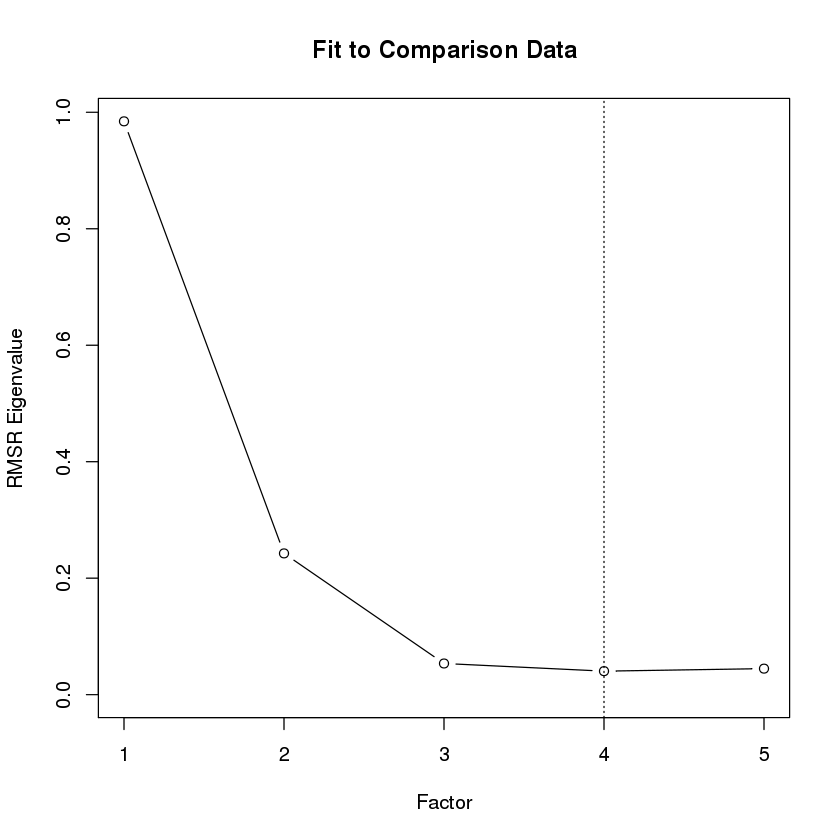

In [4]:
efa = EFA.Comp.Data(Data=data, F.Max=10, Graph=T) #calculate number of components

## Calculate PCA 
With rotation for the selected number of components

In [5]:
fit = principal(data, nfactors = efa, rotate='varimax') #calculate PCA with rotation

In [6]:
df_loadings = cbind(data.frame(unclass(fit$loadings)), data.frame(fit$communality))
rownames(df_loadings) = active_elecs
#df_SSloadings = data.frame(fit$values[1:efa])

In [7]:
dim(df_loadings)

[1] 17  5

## Plot PCs

In [8]:
#get components
scores = as.data.frame(cbind(fit$scores, 1:nrow(fit$scores)))
#rename column to 'time'
timename = tail(colnames(scores),n=1) #V5
names(scores)[names(scores)==timename] <- "time" 

scores.long = melt(scores, id.vars = "time")
p <- ggplot(data=scores.long, aes(x = time, y = value)) + geom_line(aes(colour=variable),size=1.5) + xlab('time')+ scale_colour_hue(l=40) + theme_bw(base_size = 12) + theme_classic()+ scale_size_discrete()


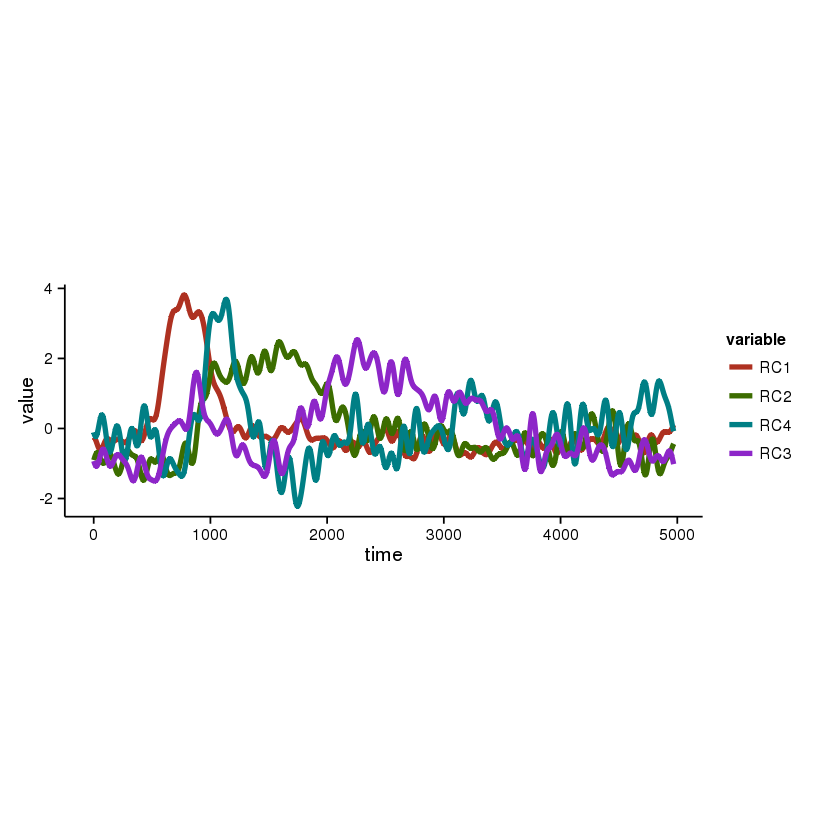

In [9]:
p + coord_fixed(ratio = 300)

In [10]:
filename = paste(subj, '_', task, '_loadings.csv', sep = '')
write.table(df_loadings, file = filename, sep =",", row.names=TRUE)

In [11]:
df_loadings

,RC1,RC2,RC4,RC3,fit.communality
6,-0.3627635,0.8068225,0.1732548,-0.002128885,0.8125816
7,-0.2312979,0.6905523,0.3822642,0.02980739,0.6773757
14,-0.2827749,0.7788606,0.2069483,0.214809,0.775556
15,0.1310148,0.2985076,0.8656579,-0.08172888,0.8623148
21,0.9276527,-0.05546637,0.2347815,0.1051999,0.9298053
22,0.2281424,0.3437281,0.6927407,-0.07242374,0.6553328
23,0.4727785,0.531253,0.5266586,0.2128417,0.8284201
24,0.1936884,0.7227365,0.4415709,0.2001592,0.7949118
28,0.9387027,0.0867197,0.1565342,0.1698028,0.942019
29,0.9485341,-0.1023095,0.07061709,0.04436155,0.917139


## Single Trial PCA

In [12]:
setwd('/home/knight/matar/PYTHON/ECOGpy/')
library(proxy)
library(reshape2)
library(psych)

#params = c('maxes_rel','medians','stds', 'means', 'maxes')
p = 'means'

DATADIR = '/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Stats/outliers/for_PCA/zscore/' #csv files with values for each subj/task with outlier rejection for PCA (all elecs have same number of trials, each feature has different number of trials)

d = read.table('test.subjects',sep = '_')
i = 12

subj = d$V1[i]
task = d$V2[i]

data = read.csv(paste(DATADIR, subj, '_', task, '_', p, '.csv', sep = ""), header = T, stringsAsFactors = F)
data = data.matrix(data)

In [13]:
num_pcs = dim(data)[2] #start with num pcs == num elecs
fit = principal(data, nfactors = num_pcs, rotate='none') #calculate PCA
num_pcs = sum(fit$values>1) #kaiser rule
fit = principal(data, nfactors = num_pcs, rotate = 'none', scores = TRUE)    

In [14]:
fit

Principal Components Analysis
Call: principal(r = data, nfactors = num_pcs, rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   PC2   PC3   PC4   PC5   h2   u2
X6   0.75 -0.41 -0.10  0.00 -0.14 0.75 0.25
X7   0.50 -0.43  0.00  0.12 -0.03 0.45 0.55
X14  0.74 -0.10 -0.27 -0.28  0.17 0.73 0.27
X15  0.30 -0.17 -0.56  0.31 -0.19 0.56 0.44
X21 -0.02  0.31 -0.31  0.27  0.70 0.75 0.25
X22  0.44  0.22  0.01  0.48 -0.15 0.49 0.51
X23  0.60  0.20  0.29  0.06 -0.06 0.49 0.51
X24  0.80 -0.31  0.01 -0.04 -0.12 0.75 0.25
X28  0.31  0.34 -0.28 -0.33 -0.04 0.40 0.60
X29  0.27  0.76  0.10 -0.20 -0.15 0.73 0.27
X30  0.23  0.46  0.26  0.48 -0.27 0.64 0.36
X31  0.23 -0.17  0.60 -0.09  0.26 0.51 0.49
X36  0.37  0.36 -0.25  0.17  0.48 0.59 0.41
X38  0.19  0.09 -0.11  0.46  0.07 0.27 0.73
X44  0.08  0.18  0.52  0.32 -0.04 0.42 0.58
X45  0.30  0.58 -0.13 -0.50 -0.23 0.75 0.25
X53  0.46 -0.09  0.48 -0.26  0.41 0.69 0.31

                       PC1  PC